# Resumos e um pouco de Visualização no pandas


## Resumo

Vamos ver alguns métodos para analisar nossas tabelas (dataframes)

Além disso, vamos usar os plot de gráfico padrões do pandas, mas no projeto de DataScience veremos outras mais bonitas e também muito práticas.

OBS: O pandas usa o matplotlib (que vimos na seção de "módulos e bibliotecas") para plotar gráficos.<br>
Se quiser personalizar mais do que o padrão do pandas, importe o matplotlib e use os métodos do matplotlib

- Preparando as bases de dados (o que fizemos na última aula)

In [ ]:
import pandas as pd
#importando os arquivos
vendas_df = pd.read_csv(r'Contoso - Vendas - 2017.csv', encoding='ISO-8859-1', sep=';')
produtos_df = pd.read_csv(r'Contoso - Cadastro Produtos.csv', encoding='ISO-8859-1', sep=';')
lojas_df = pd.read_csv(r'Contoso - Lojas.csv', encoding='ISO-8859-1', sep=';')
clientes_df = pd.read_csv(r'Contoso - Clientes.csv', encoding='ISO-8859-1', sep=';')

clientes_df = clientes_df.rename(columns={'ÿID Cliente': 'ID Cliente'})
produtos_df = produtos_df.rename(columns={'ÿNome do Produto': 'Nome do Produto'})
lojas_df = lojas_df.rename(columns={'ÿID Loja': 'ID Loja'})

#limpando apenas as colunas que queremos
clientes_df = clientes_df[['ID Cliente', 'E-mail']]
produtos_df = produtos_df[['ID Produto', 'Nome do Produto']]
lojas_df = lojas_df[['ID Loja', 'Nome da Loja']]

#mesclando e renomeando os dataframes
vendas_df = vendas_df.merge(produtos_df, on='ID Produto')
vendas_df = vendas_df.merge(lojas_df, on='ID Loja')
vendas_df = vendas_df.merge(clientes_df, on='ID Cliente').rename(columns={'E-mail': 'E-mail do Cliente'})
display(vendas_df)

### Qual cliente que comprou mais vezes?

- Usaremos o método .value_counts() para contar quantas vezes cada valor do Dataframe aparece
- Usaremos o método .plot() para exibir um gráfico

In [ ]:
frequencia_clientes = vendas_df['E-mail do Cliente'].value_counts()
frequencia_clientes

frequencia_clientes[:5].plot(figsize=(15, 5))

### Qual a Loja que mais vendeu?

- Usaremos o .groupby para agrupar o nosso dataframe, de acordo com o que queremos (somando as quantidades de vendas, por exemplo)

In [4]:
vendas_lojas = vendas_df.groupby('Nome da Loja').sum()
vendas_lojas = vendas_lojas[['Quantidade Vendida']]
display(vendas_lojas)

,Quantidade Vendida
Nome da Loja,
Loja Contoso Albany,26353
Loja Contoso Alexandria,26247
Loja Contoso Amsterdam,28294
Loja Contoso Anchorage,27451
Loja Contoso Annapolis,26065
...,...
Loja Contoso Yokohama,28023
Loja Contoso York,27164
Loja Contoso koln No.1,29046


- Agora precisamos pegar o maior valor. Temos 2 formas:
    1. Ordenar o dataframe em ordem decrescente de Quantidade Vendida
        - Método .sort_values
    2. Pegar o Maior valor diretamente
        - Métodos .max() e .idxmax()

,Quantidade Vendida
Nome da Loja,
Loja Contoso Catalog,1029117
Loja Contoso North America Online,701961
Loja Contoso Europe Online,616845
Loja Contoso Asia Online,578458
Loja Contoso North America Reseller,520176
...,...
Loja Contoso Berlin,379
Loja Contoso Paterson,371
Loja Contoso Marseille,370


<Axes: xlabel='Nome da Loja'>

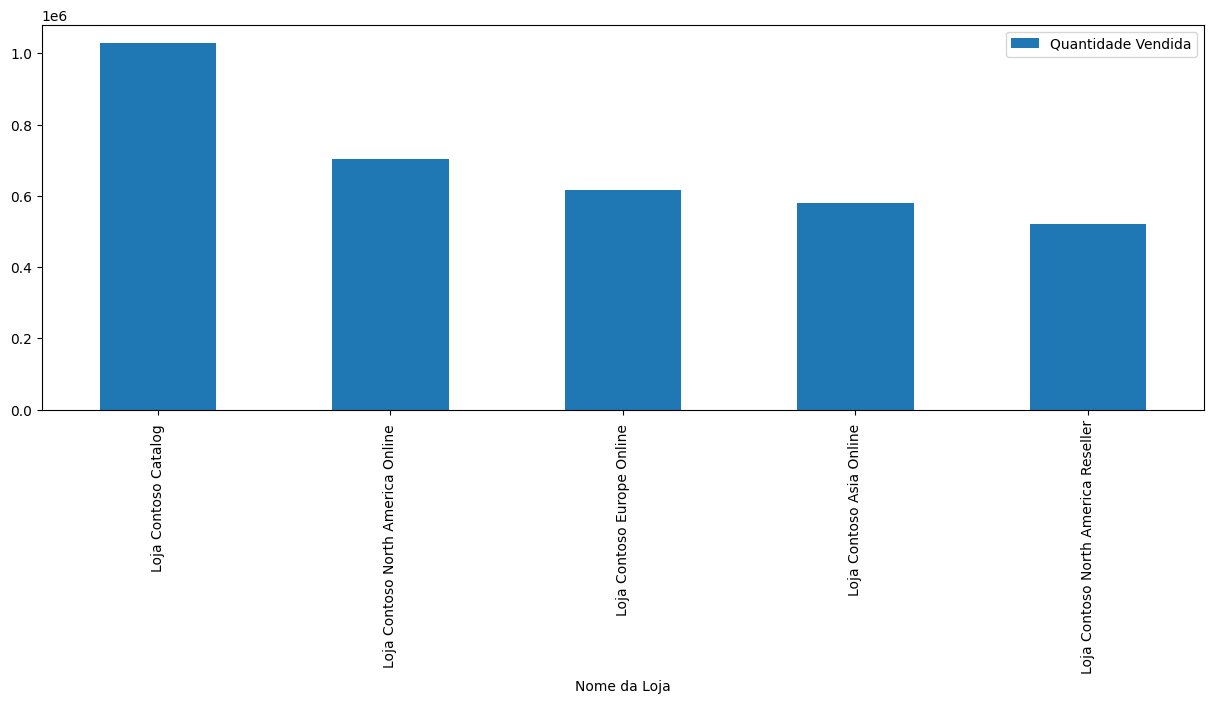

In [8]:
#ordenando o dataframe
vendas_lojas = vendas_lojas.sort_values('Quantidade Vendida', ascending=False)
display(vendas_lojas)
#podemos plotar em um gráfico
vendas_lojas[:5].plot(figsize=(15, 5), kind='bar')

In [9]:
#pegando o maior valor e se índice
maior_valor = vendas_lojas["Quantidade Vendida"].max()
melhor_loja = vendas_lojas["Quantidade Vendida"].idxmax()
print(melhor_loja, ": ", maior_valor)

Loja Contoso Catalog  :  1029117


### Qual produto que menos vendeu?

- Já temos uma lista criada para isso, basta verificarmos o final da lista (já que ela está ordenada) ou então usarmos os métodos:
    1. min()
    2. idxmin()

In [11]:
menor_valor = vendas_lojas["Quantidade Vendida"].min()
pior_loja = vendas_lojas["Quantidade Vendida"].idxmin()
print(pior_loja, ": ", menor_valor)
#ou
vendas_lojas[-1:]

Loja Contoso Venezia  :  234


,Quantidade Vendida
Nome da Loja,
Loja Contoso Venezia,234
